In [1]:
%cd /content/drive/MyDrive/ML/Intent Classification

/content/drive/MyDrive/ML/Intent Classification


In [2]:
import pandas as pd

In [5]:
import pandas as pd 
tsv_file='Dataset.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('new_name.csv',index=False)

In [6]:
sentence = pd.read_csv('new_name.csv', error_bad_lines=False)

In [7]:
sentence

,sentence,label
0,what alarms do i have set right now,0
1,checkout today alarm of meeting,0
2,report alarm settings,0
3,see see for me the alarms that you have set to...,0
4,is there an alarm for ten am,0
...,...,...
9955,how hot is it in miami,63
9956,will it snow next week,63
9957,am i gonna need rain boots,63
9958,should i bring warm clothes,63


In [8]:
intent = pd.read_csv('Intent_labels.csv', error_bad_lines=False)

In [9]:
intent

,intents
0,alarm_query
1,alarm_remove
2,alarm_set
3,audio_volume_down
4,audio_volume_mute
...,...
59,transport_query
60,transport_taxi
61,transport_ticket
62,transport_traffic


In [10]:
intent.head(5)

,intents
0,alarm_query
1,alarm_remove
2,alarm_set
3,audio_volume_down
4,audio_volume_mute


In [11]:
intent['intents'][0]

'alarm_query'

In [12]:
sentence['sentence'][0]

'what alarms do i have set right now'

In [13]:
sentence['label'][440]

2

In [14]:
t = []
dummy = pd.DataFrame(t, columns = ['sentence', 'intents'])
dummy

,sentence,intents


In [15]:
type(dummy)

pandas.core.frame.DataFrame

In [16]:
for i in range(len(sentence['sentence'])):
  print(sentence['sentence'][i])
  print(intent['intents'][sentence['label'][i]])
  #dummy['sentence'].append(sentence['sentence'][i])
  #dummy['intents'].append(intent['intents'][sentence['label'][i]])
  new_row = {'sentence':sentence['sentence'][i], 'intents':intent['intents'][sentence['label'][i]]}
  dummy = dummy.append(new_row, ignore_index=True)
  

Streaming output truncated to the last 5000 lines.
what does the word hypocrisy mean
qa_definition
describe the empire state building
qa_definition
what is the meaning of the word sanctimonious
qa_definition
how would the volkswagen golf car look like
qa_definition
define and describe an ultraviolet ray
qa_definition
how would you describe a tennis ball
qa_definition
what does joke mean
qa_definition
what does formidable mean
qa_definition
what i can do with laptop
qa_definition
how do you describe a capabara
qa_definition
define forensic
qa_definition
tell me what a workhouse is
qa_definition
what is the definition of god
qa_definition
what does a baguette look like
qa_definition
look up the meaning of logic
qa_definition
describe to me what a ball looks like
qa_definition
what does session mean
qa_definition
hey what does incite mean
qa_definition
Explain object
qa_definition
define session
qa_definition
how many legs does a dog have
qa_factoid
who was the first president of united s

In [17]:
dummy.head()

,sentence,intents
0,what alarms do i have set right now,alarm_query
1,checkout today alarm of meeting,alarm_query
2,report alarm settings,alarm_query
3,see see for me the alarms that you have set to...,alarm_query
4,is there an alarm for ten am,alarm_query


In [18]:
dummy.to_csv('dummy.csv')

In [19]:
import pandas as pd
import numpy as np
from sklearn import tree
#import pydotplus
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report

In [20]:
dummy

,sentence,intents
0,what alarms do i have set right now,alarm_query
1,checkout today alarm of meeting,alarm_query
2,report alarm settings,alarm_query
3,see see for me the alarms that you have set to...,alarm_query
4,is there an alarm for ten am,alarm_query
...,...,...
9955,how hot is it in miami,weather_query
9956,will it snow next week,weather_query
9957,am i gonna need rain boots,weather_query
9958,should i bring warm clothes,weather_query


In [21]:
dummy['intents'].value_counts()

calendar_remove      175
calendar_set         175
play_game            175
email_query          175
takeaway_query       175
                    ... 
datetime_convert      79
audio_volume_down     72
music_settings        70
iot_wemo_on           69
iot_hue_lighton       35
Name: intents, Length: 64, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


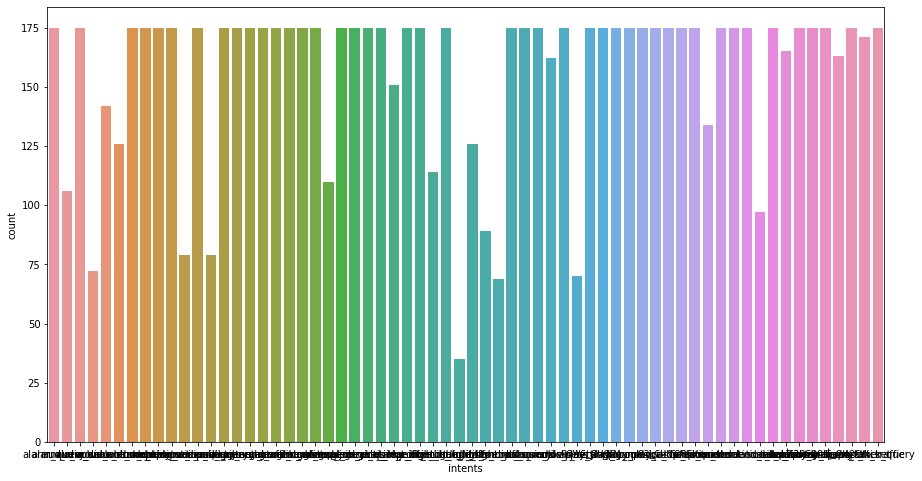

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
seaborn.countplot(dummy['intents'])

In [23]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9960 entries, 0 to 9959
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  9960 non-null   object
 1   intents   9960 non-null   object
dtypes: object(2)
memory usage: 155.8+ KB


In [26]:
a =dummy['intents'].value_counts()

In [30]:
print(a)

calendar_remove      175
calendar_set         175
play_game            175
email_query          175
takeaway_query       175
                    ... 
datetime_convert      79
audio_volume_down     72
music_settings        70
iot_wemo_on           69
iot_hue_lighton       35
Name: intents, Length: 64, dtype: int64


In [28]:
a.index[0]

'calendar_remove'

In [29]:
a[0]

175

In [31]:
final_intents = []
for i in range(len(a.index)):
  #print(a.index[i],a[i])
  if a[i] >= 140:
    final_intents.append(a.index[i])

final_intents


['calendar_remove',
 'calendar_set',
 'play_game',
 'email_query',
 'takeaway_query',
 'qa_factoid',
 'music_query',
 'general_affirm',
 'email_querycontact',
 'play_radio',
 'cooking_recipe',
 'lists_remove',
 'play_audiobook',
 'play_music',
 'social_post',
 'qa_currency',
 'qa_stock',
 'iot_hue_lightoff',
 'general_quirky',
 'transport_query',
 'weather_query',
 'general_explain',
 'general_repeat',
 'iot_coffee',
 'transport_ticket',
 'alarm_query',
 'lists_createoradd',
 'general_dontcare',
 'email_sendemail',
 'qa_definition',
 'lists_query',
 'general_praise',
 'general_confirm',
 'general_commandstop',
 'takeaway_order',
 'calendar_query',
 'general_negate',
 'alarm_set',
 'recommendation_locations',
 'iot_hue_lightchange',
 'recommendation_events',
 'news_query',
 'datetime_query',
 'play_podcasts',
 'transport_traffic',
 'social_query',
 'transport_taxi',
 'music_likeness',
 'iot_cleaning',
 'audio_volume_mute']

In [32]:
len(final_intents)

50

In [33]:
du = pd.read_csv('dummy.csv')
du.head()

,Unnamed: 0,sentence,intents
0,0,what alarms do i have set right now,alarm_query
1,1,checkout today alarm of meeting,alarm_query
2,2,report alarm settings,alarm_query
3,3,see see for me the alarms that you have set to...,alarm_query
4,4,is there an alarm for ten am,alarm_query


In [34]:
du['intents']

0         alarm_query
1         alarm_query
2         alarm_query
3         alarm_query
4         alarm_query
            ...      
9955    weather_query
9956    weather_query
9957    weather_query
9958    weather_query
9959    weather_query
Name: intents, Length: 9960, dtype: object

In [35]:
final_data = du[du['intents'].isin(final_intents)]

In [36]:
len(final_data['intents'].unique())

50

In [37]:
final_data.value_counts('intents')

intents
weather_query               175
general_commandstop         175
iot_hue_lightchange         175
iot_coffee                  175
general_repeat              175
general_quirky              175
general_praise              175
general_negate              175
general_explain             175
general_dontcare            175
general_confirm             175
general_affirm              175
lists_query                 175
email_sendemail             175
email_querycontact          175
email_query                 175
datetime_query              175
cooking_recipe              175
calendar_set                175
calendar_remove             175
calendar_query              175
alarm_set                   175
iot_hue_lightoff            175
lists_createoradd           175
lists_remove                175
qa_currency                 175
transport_ticket            175
transport_query             175
takeaway_query              175
takeaway_order              175
social_post                 175


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


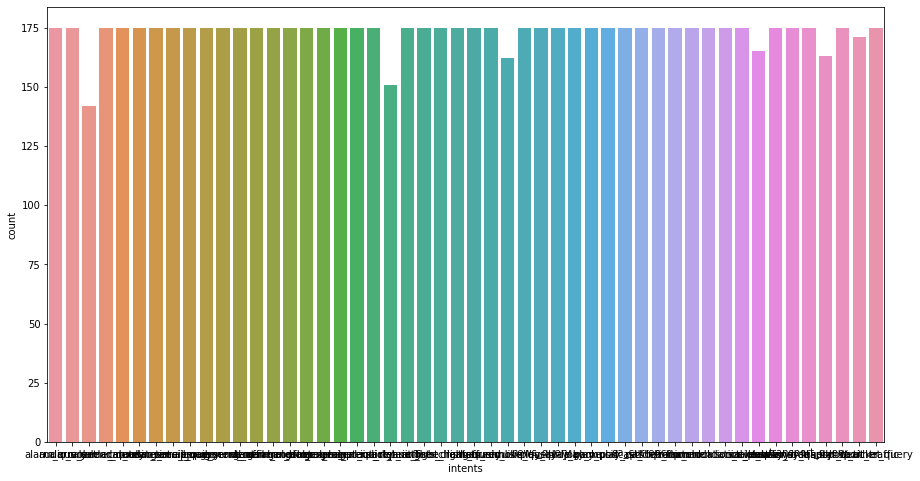

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
seaborn.countplot(final_data['intents'])

In [39]:
final_data.to_csv('final_data.csv')

In [40]:
final_data.head(5)

,Unnamed: 0,sentence,intents
0,0,what alarms do i have set right now,alarm_query
1,1,checkout today alarm of meeting,alarm_query
2,2,report alarm settings,alarm_query
3,3,see see for me the alarms that you have set to...,alarm_query
4,4,is there an alarm for ten am,alarm_query


In [41]:
final_data['Unnamed: 0']

0          0
1          1
2          2
3          3
4          4
        ... 
9955    9955
9956    9956
9957    9957
9958    9958
9959    9959
Name: Unnamed: 0, Length: 8654, dtype: int64

In [42]:
df = final_data.drop('Unnamed: 0', 1)

In [43]:
df.head(5)

,sentence,intents
0,what alarms do i have set right now,alarm_query
1,checkout today alarm of meeting,alarm_query
2,report alarm settings,alarm_query
3,see see for me the alarms that you have set to...,alarm_query
4,is there an alarm for ten am,alarm_query


In [44]:
df.to_csv('intent_dataset.csv')